reg,SVM and logit in the myfunc as input to LSTM

In [1]:
%run myfunc.py

In [3]:
#path = 'C:\\Users\Michal\Dropbox\IB_data'
path = 'C:\\Users\Michal\Desktop'+ '\SPY4Aug17.csv'
#path = '/home/octo/Dropbox'+ '/SPY4Aug17.csv'
#df=dataframe_notime(path)
df=get_csv_pd(path)

In [ ]:
#data=strat_lr(df)
data=strat_class(df)

C:\Users\Michal\Dropbox\DataScience\myfunc.py:47: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).max()
  df['UT']=(pd.rolling_max(df.High,60)+pd.rolling_max(df.P+df.High-df.Low,60))*0.5
C:\Users\Michal\Dropbox\DataScience\myfunc.py:48: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).min()
  df['DT']=(pd.rolling_min(df.Low,60)+pd.rolling_min(df.P+df.High-df.Low,60))*0.5
C:\Users\Michal\Dropbox\DataScience\myfunc.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dt['predict']=predict
C:\Users\Michal\Dropbox\DataScience\myfunc.py:108: SettingWithCopyWarning: 
A

In [54]:
df=data[['Close','vel','sigma','P','pREG','predict_svm','predict_lm']]

In [55]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [56]:
#plt.plot(data.predict_svm)
#plt.show()

In [57]:
dataset = df.values
dataset = df.astype('float32')

In [58]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [59]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [60]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

27952 6988


In [61]:
#train[:,0]

In [62]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [63]:
#trainX.shape
#trainX.shape[0]
#trainX.shape[1]

In [64]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],trainX.shape[1],trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0],testX.shape[1],testX.shape[2]))

In [65]:
#trainX.shape

In [66]:
epochs=3
batch_size=25

In [67]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,7)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs, batch_size, verbose=2)

Epoch 1/25
19s - loss: 8.3318e-04
Epoch 2/25
19s - loss: 9.2251e-05
Epoch 3/25
19s - loss: 7.7199e-05
Epoch 4/25
21s - loss: 6.8619e-05
Epoch 5/25
22s - loss: 6.4241e-05
Epoch 6/25
23s - loss: 6.0008e-05
Epoch 7/25
24s - loss: 5.6704e-05
Epoch 8/25
24s - loss: 5.5660e-05
Epoch 9/25
25s - loss: 5.3259e-05
Epoch 10/25
25s - loss: 5.1925e-05
Epoch 11/25
25s - loss: 5.0101e-05
Epoch 12/25
25s - loss: 5.0226e-05
Epoch 13/25
25s - loss: 4.8804e-05
Epoch 14/25
25s - loss: 4.8512e-05
Epoch 15/25
25s - loss: 4.7428e-05
Epoch 16/25
25s - loss: 4.6492e-05
Epoch 17/25
25s - loss: 4.5922e-05
Epoch 18/25
25s - loss: 4.5091e-05
Epoch 19/25
25s - loss: 4.4437e-05
Epoch 20/25
25s - loss: 4.4127e-05
Epoch 21/25
25s - loss: 4.3822e-05
Epoch 22/25
25s - loss: 4.2698e-05
Epoch 23/25
25s - loss: 4.2506e-05
Epoch 24/25
25s - loss: 4.1745e-05
Epoch 25/25
25s - loss: 4.1375e-05


In [68]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

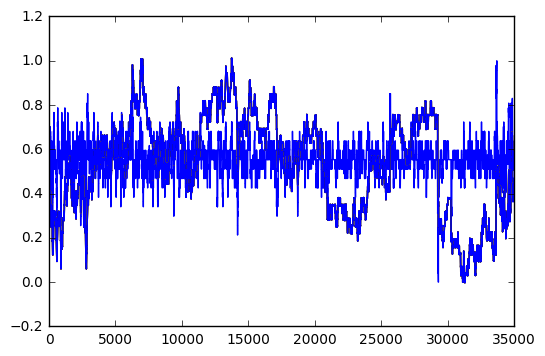

In [90]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset[:,1])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [91]:
model.save("elevenaug.h5")